In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Workflow of my data analysis and visualization:

Problem:

Retailer wise data analysis and visualization.

1-    Location/zip code wise retailer’s response.

A-  At which location retailers are more active?

B-  Which retailer is returning more article and why?

C-  Which location/retailer is active and inactive?


2-     Retailer’s buying statistics (what and when).

A-  Who is buying smart phones?

B-  Who is buying other accessories?

C-  What we are selling most in accessories and when?

 

3-    Inventory forecast according to the retailer’s engagement with the application.

A-  Time wise inventory analysis and visualization to do better inventory planning.

B-  Accessories and phone wise planning.

C-  Looking forward to see additional accessories.

 

Results will be presented over graphs using Python and Additional tool such as PowerBI/ Tableau/Qlik etc.

 

In [295]:
df= pd.read_csv("DataJune-Sept.csv", encoding="latin1")

In [296]:
df.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,rom,requestid,Category,SubCategory,TotalAmount,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount
0,B2B20060108722,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,32GB,GWD1035000,PreOwned,E,5999,COD,COD,NaN,South,5519
1,B2B20060108723,01-06-2020 00:27,Pre Delivery Returns,TaVe0501,635810,Vellore,Tamil Nadu,PDXia0242,Xiaomi,Redmi Y2,...,64GB,GWD982802,PreOwned,D,8199,COD,COD,NaN,South,7552
2,B2B20060108724,01-06-2020 00:50,Order Cancel,GUJu0004,362275,Junagadh,GUJARAT,APMob0004,Mobcare,S20 10000mAh,...,NaN,JSDPWB00056,Accessories,P,1100,COD,COD,NaN,West,1100
3,B2B20060108727,01-06-2020 03:59,Delivered,KeKo0579,691574,Kollam,Kerala,RDGoo0037,Google,Pixel 2 Xl,...,64GB,GWD798232,Refurbished,D,16999,Prepaid,paytm,NaN,South,14428
4,B2B20060108727,01-06-2020 03:59,Delivered,KeKo0579,691574,Kollam,Kerala,AUYaa0014,Yaantra,Usb Apple Lightning Cable,...,NaN,ACXUSB35798,Accessories,U,149,Prepaid,paytm,NaN,South,6


In [297]:
df_split= pd.DataFrame(df.DateOfBooking.str.split().tolist(), columns="d_date d_time".split())

In [298]:
df_split.head()

,d_date,d_time
0,01-06-2020,00:23
1,01-06-2020,00:27
2,01-06-2020,00:50
3,01-06-2020,03:59
4,01-06-2020,03:59


In [299]:
df.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,rom,requestid,Category,SubCategory,TotalAmount,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount
0,B2B20060108722,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,32GB,GWD1035000,PreOwned,E,5999,COD,COD,NaN,South,5519
1,B2B20060108723,01-06-2020 00:27,Pre Delivery Returns,TaVe0501,635810,Vellore,Tamil Nadu,PDXia0242,Xiaomi,Redmi Y2,...,64GB,GWD982802,PreOwned,D,8199,COD,COD,NaN,South,7552
2,B2B20060108724,01-06-2020 00:50,Order Cancel,GUJu0004,362275,Junagadh,GUJARAT,APMob0004,Mobcare,S20 10000mAh,...,NaN,JSDPWB00056,Accessories,P,1100,COD,COD,NaN,West,1100
3,B2B20060108727,01-06-2020 03:59,Delivered,KeKo0579,691574,Kollam,Kerala,RDGoo0037,Google,Pixel 2 Xl,...,64GB,GWD798232,Refurbished,D,16999,Prepaid,paytm,NaN,South,14428
4,B2B20060108727,01-06-2020 03:59,Delivered,KeKo0579,691574,Kollam,Kerala,AUYaa0014,Yaantra,Usb Apple Lightning Cable,...,NaN,ACXUSB35798,Accessories,U,149,Prepaid,paytm,NaN,South,6


In [300]:
df['d_date']= df_split['d_date']

In [301]:
df['d_time']= df_split['d_time']

In [302]:
df.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,Category,SubCategory,TotalAmount,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount,d_date,d_time
0,B2B20060108722,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,PreOwned,E,5999,COD,COD,NaN,South,5519,01-06-2020,00:23
1,B2B20060108723,01-06-2020 00:27,Pre Delivery Returns,TaVe0501,635810,Vellore,Tamil Nadu,PDXia0242,Xiaomi,Redmi Y2,...,PreOwned,D,8199,COD,COD,NaN,South,7552,01-06-2020,00:27
2,B2B20060108724,01-06-2020 00:50,Order Cancel,GUJu0004,362275,Junagadh,GUJARAT,APMob0004,Mobcare,S20 10000mAh,...,Accessories,P,1100,COD,COD,NaN,West,1100,01-06-2020,00:50
3,B2B20060108727,01-06-2020 03:59,Delivered,KeKo0579,691574,Kollam,Kerala,RDGoo0037,Google,Pixel 2 Xl,...,Refurbished,D,16999,Prepaid,paytm,NaN,South,14428,01-06-2020,03:59
4,B2B20060108727,01-06-2020 03:59,Delivered,KeKo0579,691574,Kollam,Kerala,AUYaa0014,Yaantra,Usb Apple Lightning Cable,...,Accessories,U,149,Prepaid,paytm,NaN,South,6,01-06-2020,03:59


In [303]:
new_df_Vellore = df[((df.city=="Vellore") & (df.status=='Delivered'))]

In [304]:
new_df_Vellore.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,Category,SubCategory,TotalAmount,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount,d_date,d_time
0,B2B20060108722,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,PreOwned,E,5999,COD,COD,NaN,South,5519,01-06-2020,00:23
2717,B2B20060611243,06-06-2020 18:08,Delivered,TaVe0457,635652,Vellore,Tamil Nadu,RDXia0126,Xiaomi,Mi A1,...,Refurbished,D,5999,Wallet,wallet,NaN,South,5019,06-06-2020,18:08
3207,B2B20060811797,08-06-2020 17:08,Delivered,TaVe0417,635901,Vellore,Tamil Nadu,PDone0025,OnePlus,3,...,PreOwned,D,6199,Prepaid,EaseBuzz,NaN,South,5202,08-06-2020,17:08
4199,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,PreOwned,D,7299,Prepaid,EaseBuzz,NaN,South,5900,11-06-2020,15:21
4200,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,PreOwned,D,7299,Prepaid,EaseBuzz,NaN,South,5900,11-06-2020,15:21


In [305]:
import matplotlib.pyplot as plt

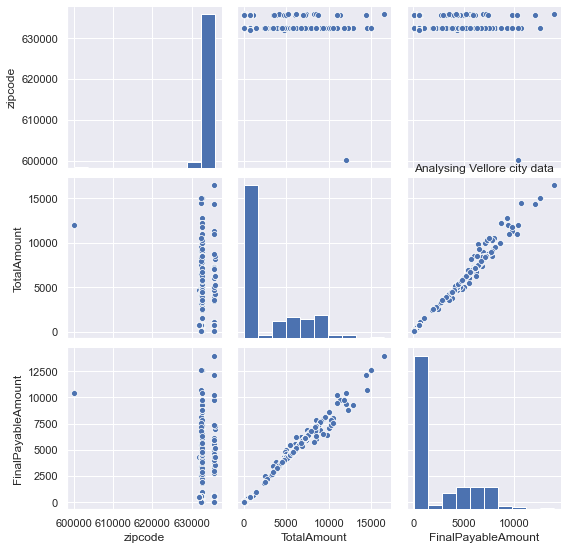

In [306]:
sns.pairplot(new_df_Vellore)
plt.title("Analysing Vellore city data")
plt.savefig("Vellore.jpeg")
plt.show()

In [307]:
new_df_Vellore.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,Category,SubCategory,TotalAmount,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount,d_date,d_time
0,B2B20060108722,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,PreOwned,E,5999,COD,COD,NaN,South,5519,01-06-2020,00:23
2717,B2B20060611243,06-06-2020 18:08,Delivered,TaVe0457,635652,Vellore,Tamil Nadu,RDXia0126,Xiaomi,Mi A1,...,Refurbished,D,5999,Wallet,wallet,NaN,South,5019,06-06-2020,18:08
3207,B2B20060811797,08-06-2020 17:08,Delivered,TaVe0417,635901,Vellore,Tamil Nadu,PDone0025,OnePlus,3,...,PreOwned,D,6199,Prepaid,EaseBuzz,NaN,South,5202,08-06-2020,17:08
4199,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,PreOwned,D,7299,Prepaid,EaseBuzz,NaN,South,5900,11-06-2020,15:21
4200,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,PreOwned,D,7299,Prepaid,EaseBuzz,NaN,South,5900,11-06-2020,15:21


In [308]:
new_df_vellore_new= pd.DataFrame(new_df_Vellore.d_date.str.split("-").tolist(),columns="day month year".split())

In [309]:
#df_vellore=new_df_vellore_new.copy()
new_df_vellore_new=df_vellore.copy()

In [310]:
df_vellore['month'] = df_vellore['month']. replace(['06','07', '08', '09'],['June','July','August','September'])

In [311]:
df_vellore.head(50-120)

,day,month,year
0,01,June,2020
1,06,June,2020
2,08,June,2020
3,11,June,2020
4,11,June,2020
...,...,...,...
573,04,September,2020
574,05,September,2020
575,05,September,2020
576,05,September,2020


In [312]:
df_vellore_month=df_vellore.copy()

In [313]:
new_df_vellore_time= pd.DataFrame(new_df_Vellore.d_time.str.split(":").tolist(),columns="hour minutes".split())

In [314]:
new_df_vellore_time.head(50-120)

,hour,minutes
0,00,23
1,18,08
2,17,08
3,15,21
4,15,21
...,...,...
573,21,03
574,22,42
575,22,44
576,22,44


In [315]:
new_df_vellore_time['hour'].value_counts()

16    154
20    102
22     77
21     71
23     54
00     30
17     28
18     28
14     24
11     21
10     11
12      8
15      7
01      7
19      7
06      5
13      5
08      4
07      3
09      2
Name: hour, dtype: int64

In [316]:
new_df_vellore_time['hour']= new_df_vellore_time['hour'].replace(["00", "01", "06", "07", "08", "09", "10","11" ,"12" ,"13" ,"14", "15" ,"16" ,"17" ,"18" ,"19","20" ,"21","22","23"],
                                                                  ["0th-hrs", "1th-hrs" ,"6th-hrs" ,"7th-hrs" ,"8th-hrs","9th-hrs" ,"10th-hrs" ,
                                                                   "11th-hrs","12th-hrs","13th-hrs" ,"14th-hrs" ,"15th-hrs", "16th-hrs", "17th-hrs","18th-hrs","19th-hrs","20th-hrs","21th-hrs",
                                                                  "22th-hrs", "23th-hrs"])

In [317]:
new_df_vellore_time['hour'].value_counts()

16th-hrs    154
20th-hrs    102
22th-hrs     77
21th-hrs     71
23th-hrs     54
0th-hrs      30
18th-hrs     28
17th-hrs     28
14th-hrs     24
11th-hrs     21
10th-hrs     11
12th-hrs      8
1th-hrs       7
15th-hrs      7
19th-hrs      7
6th-hrs       5
13th-hrs      5
8th-hrs       4
7th-hrs       3
9th-hrs       2
Name: hour, dtype: int64

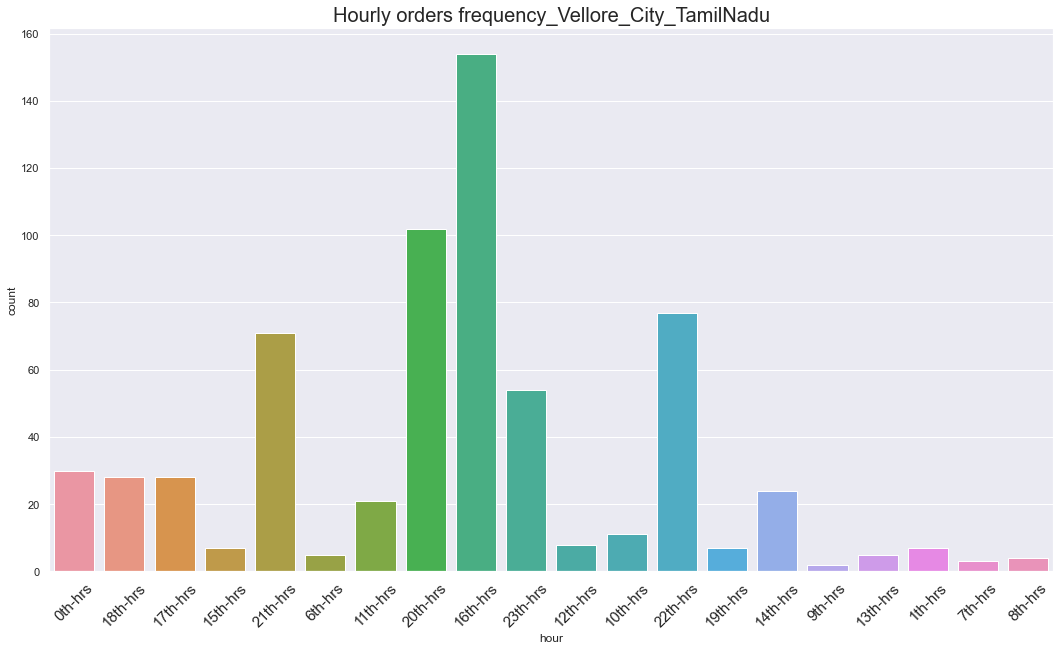

In [318]:
plt.figure(figsize=(18,10))
counting = sns.countplot(new_df_vellore_time['hour'])
plt.title("Hourly orders frequency_Vellore_City_TamilNadu", fontsize=20)
counting.set_xticklabels(counting.get_xticklabels(), rotation=45, fontsize=15)
plt.savefig("Timely_Vellore_order_frequency.jpeg")
plt.show()

In [319]:
 new_df_vellore_time.shape

(648, 2)

In [320]:
df_vellore.shape

(648, 3)

In [321]:
new_df_vellore_time.head()

,hour,minutes
0,0th-hrs,23
1,18th-hrs,08
2,17th-hrs,08
3,15th-hrs,21
4,15th-hrs,21


In [322]:
new_df_Vellore['vellore_purchasing_time']= new_df_vellore_time['hour']

In [323]:
new_df_Vellore.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,SubCategory,TotalAmount,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount,d_date,d_time,vellore_purchasing_time
0,B2B20060108722,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,E,5999,COD,COD,NaN,South,5519,01-06-2020,00:23,0th-hrs
2717,B2B20060611243,06-06-2020 18:08,Delivered,TaVe0457,635652,Vellore,Tamil Nadu,RDXia0126,Xiaomi,Mi A1,...,D,5999,Wallet,wallet,NaN,South,5019,06-06-2020,18:08,NaN
3207,B2B20060811797,08-06-2020 17:08,Delivered,TaVe0417,635901,Vellore,Tamil Nadu,PDone0025,OnePlus,3,...,D,6199,Prepaid,EaseBuzz,NaN,South,5202,08-06-2020,17:08,NaN
4199,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,D,7299,Prepaid,EaseBuzz,NaN,South,5900,11-06-2020,15:21,NaN
4200,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,D,7299,Prepaid,EaseBuzz,NaN,South,5900,11-06-2020,15:21,NaN


In [324]:
new_df_Vellore['vellore_purchasing_time'].head()

0       0th-hrs
2717        NaN
3207        NaN
4199        NaN
4200        NaN
Name: vellore_purchasing_time, dtype: object

In [325]:
new_df_Vellore.drop('vellore_purchasing_time', axis=1)

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,Category,SubCategory,TotalAmount,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount,d_date,d_time
0,B2B20060108722,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,PreOwned,E,5999,COD,COD,NaN,South,5519,01-06-2020,00:23
2717,B2B20060611243,06-06-2020 18:08,Delivered,TaVe0457,635652,Vellore,Tamil Nadu,RDXia0126,Xiaomi,Mi A1,...,Refurbished,D,5999,Wallet,wallet,NaN,South,5019,06-06-2020,18:08
3207,B2B20060811797,08-06-2020 17:08,Delivered,TaVe0417,635901,Vellore,Tamil Nadu,PDone0025,OnePlus,3,...,PreOwned,D,6199,Prepaid,EaseBuzz,NaN,South,5202,08-06-2020,17:08
4199,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,PreOwned,D,7299,Prepaid,EaseBuzz,NaN,South,5900,11-06-2020,15:21
4200,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,PreOwned,D,7299,Prepaid,EaseBuzz,NaN,South,5900,11-06-2020,15:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48945,B2B20092063259,20-09-2020 06:08,Delivered,TaVe0434,632602,Vellore,Tamil Nadu,PDSam0947,Samsung,A7 2016,...,PreOwned,D,5799,Prepaid,paytm,NaN,South,4835,20-09-2020,06:08
48946,B2B20092063259,20-09-2020 06:08,Delivered,TaVe0434,632602,Vellore,Tamil Nadu,PDXia0260,Xiaomi,Redmi 6 Pro,...,PreOwned,D,7199,Prepaid,paytm,NaN,South,6122,20-09-2020,06:08
49748,B2B20092263914,22-09-2020 15:30,Delivered,TaVe0550,632509,Vellore,Tamil Nadu,PBXia0244,Xiaomi,Redmi Y2,...,PreOwned,B,7899,Wallet,wallet,NaN,South,6767,22-09-2020,15:30
50134,B2B20092264082,22-09-2020 19:25,Delivered,TaVe0434,632602,Vellore,Tamil Nadu,PDXia0257,Xiaomi,Redmi 6 Pro,...,PreOwned,D,6699,Prepaid,paytm,NaN,South,5663,22-09-2020,19:25


In [326]:
new_df_Vellore.shape

(648, 24)

In [327]:
new_df_Vellore['hours'] =  new_df_vellore_time.iloc[:,1].values

In [328]:
new_df_Vellore.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,TotalAmount,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount,d_date,d_time,vellore_purchasing_time,hours
0,B2B20060108722,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,5999,COD,COD,NaN,South,5519,01-06-2020,00:23,0th-hrs,23
2717,B2B20060611243,06-06-2020 18:08,Delivered,TaVe0457,635652,Vellore,Tamil Nadu,RDXia0126,Xiaomi,Mi A1,...,5999,Wallet,wallet,NaN,South,5019,06-06-2020,18:08,NaN,08
3207,B2B20060811797,08-06-2020 17:08,Delivered,TaVe0417,635901,Vellore,Tamil Nadu,PDone0025,OnePlus,3,...,6199,Prepaid,EaseBuzz,NaN,South,5202,08-06-2020,17:08,NaN,08
4199,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,7299,Prepaid,EaseBuzz,NaN,South,5900,11-06-2020,15:21,NaN,21
4200,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,7299,Prepaid,EaseBuzz,NaN,South,5900,11-06-2020,15:21,NaN,21


In [329]:
new_df_Vellore.drop('vellore_purchasing_time', axis=1)

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,SubCategory,TotalAmount,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount,d_date,d_time,hours
0,B2B20060108722,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,E,5999,COD,COD,NaN,South,5519,01-06-2020,00:23,23
2717,B2B20060611243,06-06-2020 18:08,Delivered,TaVe0457,635652,Vellore,Tamil Nadu,RDXia0126,Xiaomi,Mi A1,...,D,5999,Wallet,wallet,NaN,South,5019,06-06-2020,18:08,08
3207,B2B20060811797,08-06-2020 17:08,Delivered,TaVe0417,635901,Vellore,Tamil Nadu,PDone0025,OnePlus,3,...,D,6199,Prepaid,EaseBuzz,NaN,South,5202,08-06-2020,17:08,08
4199,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,D,7299,Prepaid,EaseBuzz,NaN,South,5900,11-06-2020,15:21,21
4200,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,D,7299,Prepaid,EaseBuzz,NaN,South,5900,11-06-2020,15:21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48945,B2B20092063259,20-09-2020 06:08,Delivered,TaVe0434,632602,Vellore,Tamil Nadu,PDSam0947,Samsung,A7 2016,...,D,5799,Prepaid,paytm,NaN,South,4835,20-09-2020,06:08,08
48946,B2B20092063259,20-09-2020 06:08,Delivered,TaVe0434,632602,Vellore,Tamil Nadu,PDXia0260,Xiaomi,Redmi 6 Pro,...,D,7199,Prepaid,paytm,NaN,South,6122,20-09-2020,06:08,08
49748,B2B20092263914,22-09-2020 15:30,Delivered,TaVe0550,632509,Vellore,Tamil Nadu,PBXia0244,Xiaomi,Redmi Y2,...,B,7899,Wallet,wallet,NaN,South,6767,22-09-2020,15:30,30
50134,B2B20092264082,22-09-2020 19:25,Delivered,TaVe0434,632602,Vellore,Tamil Nadu,PDXia0257,Xiaomi,Redmi 6 Pro,...,D,6699,Prepaid,paytm,NaN,South,5663,22-09-2020,19:25,25


In [330]:
new_df_Vellore['Months_vellore'] = df_vellore_month.iloc[:,1].values

In [331]:
new_df_Vellore.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount,d_date,d_time,vellore_purchasing_time,hours,Months_vellore
0,B2B20060108722,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,COD,COD,NaN,South,5519,01-06-2020,00:23,0th-hrs,23,June
2717,B2B20060611243,06-06-2020 18:08,Delivered,TaVe0457,635652,Vellore,Tamil Nadu,RDXia0126,Xiaomi,Mi A1,...,Wallet,wallet,NaN,South,5019,06-06-2020,18:08,NaN,08,June
3207,B2B20060811797,08-06-2020 17:08,Delivered,TaVe0417,635901,Vellore,Tamil Nadu,PDone0025,OnePlus,3,...,Prepaid,EaseBuzz,NaN,South,5202,08-06-2020,17:08,NaN,08,June
4199,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,Prepaid,EaseBuzz,NaN,South,5900,11-06-2020,15:21,NaN,21,June
4200,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,Prepaid,EaseBuzz,NaN,South,5900,11-06-2020,15:21,NaN,21,June


In [332]:
new_df_Vellore['Hours']=new_df_vellore_time.iloc[:,0].values

In [333]:
new_df_Vellore.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,PaymentDetail,FirstOrder,Zone,FinalPayableAmount,d_date,d_time,vellore_purchasing_time,hours,Months_vellore,Hours
0,B2B20060108722,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,COD,NaN,South,5519,01-06-2020,00:23,0th-hrs,23,June,0th-hrs
2717,B2B20060611243,06-06-2020 18:08,Delivered,TaVe0457,635652,Vellore,Tamil Nadu,RDXia0126,Xiaomi,Mi A1,...,wallet,NaN,South,5019,06-06-2020,18:08,NaN,08,June,18th-hrs
3207,B2B20060811797,08-06-2020 17:08,Delivered,TaVe0417,635901,Vellore,Tamil Nadu,PDone0025,OnePlus,3,...,EaseBuzz,NaN,South,5202,08-06-2020,17:08,NaN,08,June,17th-hrs
4199,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,EaseBuzz,NaN,South,5900,11-06-2020,15:21,NaN,21,June,15th-hrs
4200,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,EaseBuzz,NaN,South,5900,11-06-2020,15:21,NaN,21,June,15th-hrs


In [334]:
df_new_Vell= new_df_Vellore.drop(["date", "vellore_purchasing_time", "hours"], axis=1)

KeyError: "['date'] not found in axis"

In [335]:
df_new_Vell.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount,d_date,d_time,Months_vellore,Hours,Daysofmonth
0,B2B20060108722,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,COD,COD,NaN,South,5519,01-06-2020,00:23,June,0th-hrs,1th-day
2717,B2B20060611243,06-06-2020 18:08,Delivered,TaVe0457,635652,Vellore,Tamil Nadu,RDXia0126,Xiaomi,Mi A1,...,Wallet,wallet,NaN,South,5019,06-06-2020,18:08,June,18th-hrs,6th-day
3207,B2B20060811797,08-06-2020 17:08,Delivered,TaVe0417,635901,Vellore,Tamil Nadu,PDone0025,OnePlus,3,...,Prepaid,EaseBuzz,NaN,South,5202,08-06-2020,17:08,June,17th-hrs,9th-day
4199,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,Prepaid,EaseBuzz,NaN,South,5900,11-06-2020,15:21,June,15th-hrs,11th-day
4200,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,Prepaid,EaseBuzz,NaN,South,5900,11-06-2020,15:21,June,15th-hrs,11th-day


In [336]:
df_new_V= pd.DataFrame(df_new_V.d_date.str.split("-").tolist(),columns="dayofmonth mon yr".split())

AttributeError: 'DataFrame' object has no attribute 'd_date'

In [124]:
df_new_V.head()

,dayofmonth,mon,yr
0,01,06,2020
1,06,06,2020
2,08,06,2020
3,11,06,2020
4,11,06,2020


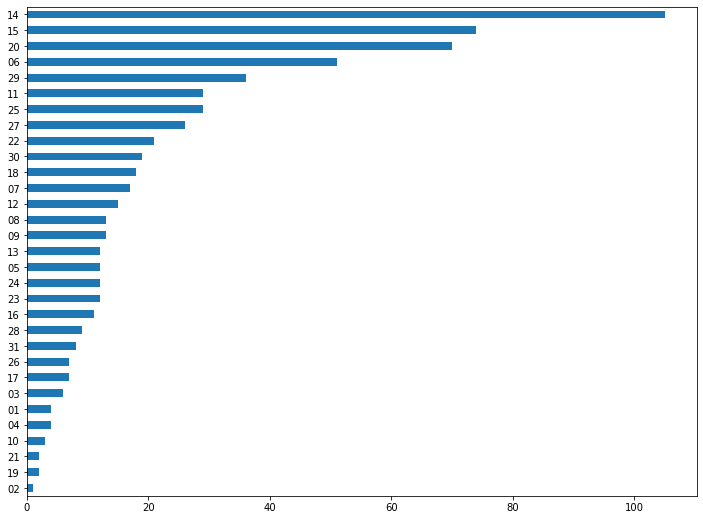

In [135]:
plt.figure(figsize=(12,9))
df_new_V['dayofmonth'].value_counts().sort_values().plot(kind='barh')

In [136]:
df_new_V['dayofmonth'].value_counts().sort_values()

02      1
19      2
21      2
10      3
04      4
01      4
03      6
17      7
26      7
31      8
28      9
16     11
23     12
24     12
05     12
13     12
09     13
08     13
12     15
07     17
18     18
30     19
22     21
27     26
25     29
11     29
29     36
06     51
20     70
15     74
14    105
Name: dayofmonth, dtype: int64

In [138]:
df_new_V['dayofmonth']=df_new_V['dayofmonth'].replace(["01","02","03","04","05","06","07","08","08","10","11","12","13","14","15",
                                                       "16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31"],
                                                      ["1th-day","2nd-day","3rd-day","4th-day","5th-day","6th-day","7th-day","8th-day",
                                                       "9th-day","10th-day","11th-day","12th-day","13th-day","14th-day","15th-day","16th-day",
                                                       "17th-day","18th-day","19th-day","20th-day","21th-day","22nd-day","23rd-day","24thth-day",
                                                       "25th-day","26-th","27th-day", "28th-day", "29th-day", "30th-day", "31st-day"])

In [139]:
df_new_V.head()

,dayofmonth,mon,yr
0,1th-day,06,2020
1,6th-day,06,2020
2,9th-day,06,2020
3,11th-day,06,2020
4,11th-day,06,2020


In [142]:
df_new_Vell.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,TotalAmount,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount,d_date,d_time,Months_vellore,Hours
0,B2B20060108722,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,5999,COD,COD,NaN,South,5519,01-06-2020,00:23,June,0th-hrs
2717,B2B20060611243,06-06-2020 18:08,Delivered,TaVe0457,635652,Vellore,Tamil Nadu,RDXia0126,Xiaomi,Mi A1,...,5999,Wallet,wallet,NaN,South,5019,06-06-2020,18:08,June,18th-hrs
3207,B2B20060811797,08-06-2020 17:08,Delivered,TaVe0417,635901,Vellore,Tamil Nadu,PDone0025,OnePlus,3,...,6199,Prepaid,EaseBuzz,NaN,South,5202,08-06-2020,17:08,June,17th-hrs
4199,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,7299,Prepaid,EaseBuzz,NaN,South,5900,11-06-2020,15:21,June,15th-hrs
4200,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,7299,Prepaid,EaseBuzz,NaN,South,5900,11-06-2020,15:21,June,15th-hrs


In [143]:
df_new_Vell['Daysofmonth']=df_new_V.iloc[:,0].values

In [144]:
df_new_Vell.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount,d_date,d_time,Months_vellore,Hours,Daysofmonth
0,B2B20060108722,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,COD,COD,NaN,South,5519,01-06-2020,00:23,June,0th-hrs,1th-day
2717,B2B20060611243,06-06-2020 18:08,Delivered,TaVe0457,635652,Vellore,Tamil Nadu,RDXia0126,Xiaomi,Mi A1,...,Wallet,wallet,NaN,South,5019,06-06-2020,18:08,June,18th-hrs,6th-day
3207,B2B20060811797,08-06-2020 17:08,Delivered,TaVe0417,635901,Vellore,Tamil Nadu,PDone0025,OnePlus,3,...,Prepaid,EaseBuzz,NaN,South,5202,08-06-2020,17:08,June,17th-hrs,9th-day
4199,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,Prepaid,EaseBuzz,NaN,South,5900,11-06-2020,15:21,June,15th-hrs,11th-day
4200,B2B20061112934,11-06-2020 15:21,Delivered,TaVe0510,635851,Vellore,Tamil Nadu,PDSam1302,Samsung,Galaxy S7,...,Prepaid,EaseBuzz,NaN,South,5900,11-06-2020,15:21,June,15th-hrs,11th-day


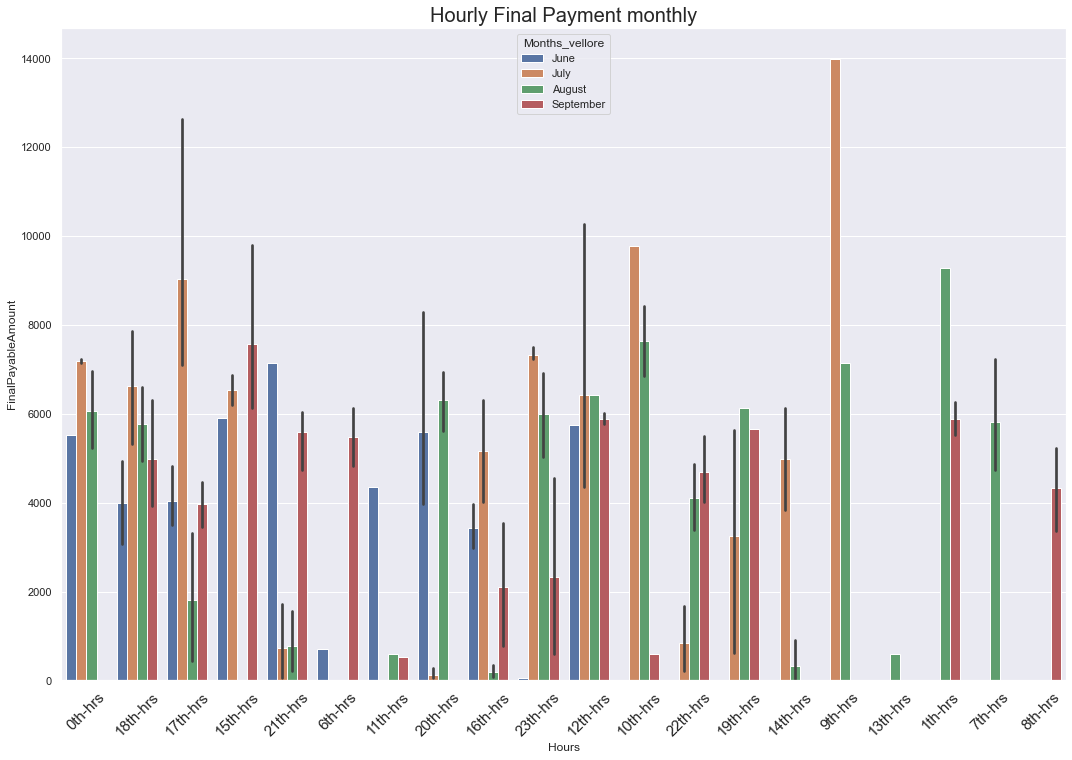

In [187]:
plt.figure(figsize=(18, 12))
plots=sns.barplot(x=df_new_Vell['Hours'], y = df_new_Vell['FinalPayableAmount'], hue=df_new_Vell['Months_vellore'] )
plots.set_xticklabels(plots.get_xticklabels(), rotation= 45, fontsize=15)
plt.title("Hourly Final Payment monthly", fontsize=20)
plt.savefig('Hourly Final Payment monthly.jpeg')
plt.show()

In [153]:
df_new_Vell['orderid'].value_counts()

B2B20062720382    20
B2B20081545287    10
B2B20080638172    10
B2B20081444611    10
B2B20080638170    10
                  ..
B2B20060108722     1
B2B20082047811     1
B2B20061816959     1
B2B20072431403     1
B2B20072834131     1
Name: orderid, Length: 196, dtype: int64

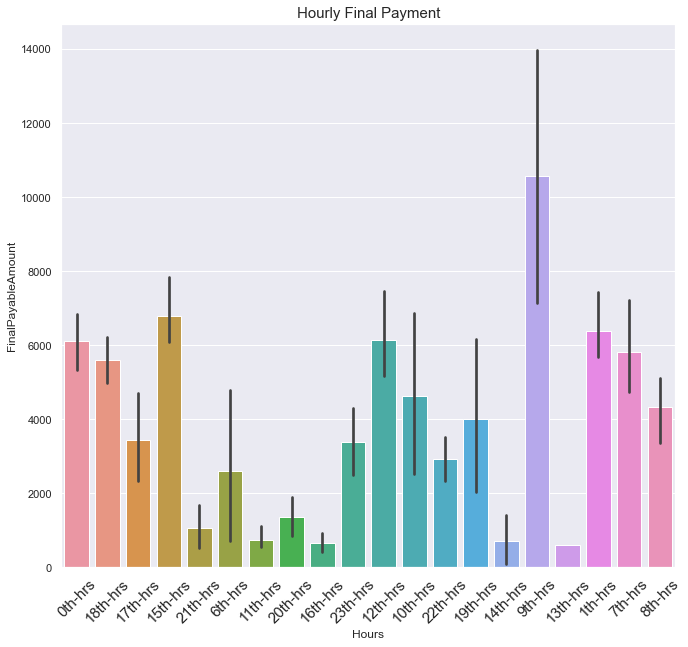

In [198]:
plt.figure(figsize=(11,10))
plots=sns.barplot(x=df_new_Vell['Hours'], y = df_new_Vell['FinalPayableAmount'])
plots.set_xticklabels(plots.get_xticklabels(), rotation= 45, fontsize=15)
plt.title("Hourly Final Payment", fontsize=15)
plt.savefig('Final Payment_Vellore.jpeg')
plt.show()

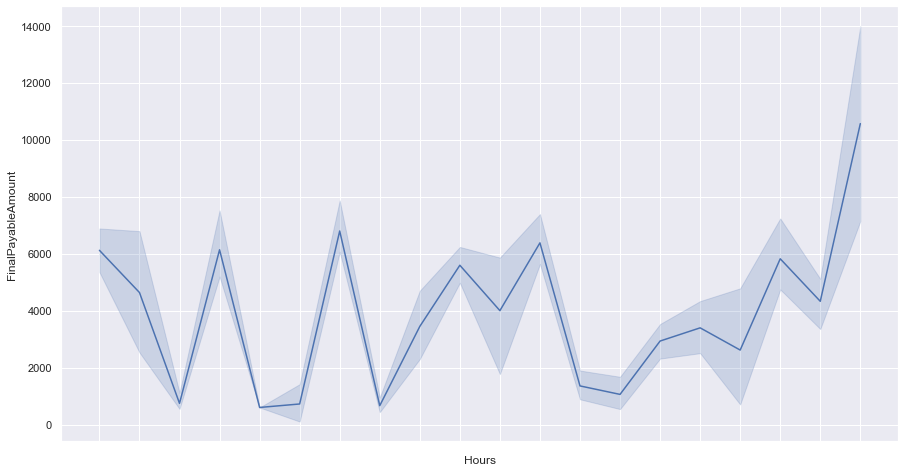

In [210]:
plt.figure(figsize=(15,8))
sns.set(style='darkgrid')
myplot = sns.lineplot(x=df_new_Vell['Hours'], y=df_new_Vell['FinalPayableAmount'], data=df_new_Vell)
myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45, fontsize=15)
plt.savefig("Hourly revenue generation in Vellore.jpeg")
plt.show()a

In [188]:
df['status'].value_counts().sort_values()

Ready for Billing                            1
Out of Stock                                 3
Lost - Debit Done To Courier                 5
RTO                                          5
Payment Verification                        14
Lost - Under Investigation at Courier       21
Confirmed                                   37
Ready to Ship                              155
Billed                                     812
Post Delivery Returns                     1479
Pre Delivery Returns                      2065
Dispatch                                  2142
Order Cancel                             12649
Delivered                                34894
Name: status, dtype: int64

In [196]:
df_vellore_cancel = df[((df.city=="Vellore") & (df.status=='Order Cancel'))]

In [197]:
df_vellore_cancel.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,Category,SubCategory,TotalAmount,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount,d_date,d_time
1328,B2B20060409981,04-06-2020 12:11,Order Cancel,TaVe0443,635852,Vellore,Tamil Nadu,PESam0390,Samsung,S6 Edge,...,PreOwned,E,6799,COD,COD,YES,South,6295,04-06-2020,12:11
2712,B2B20060611239,06-06-2020 18:03,Order Cancel,TaVe0417,635901,Vellore,Tamil Nadu,PDone0022,OnePlus,3T,...,PreOwned,D,7199,Prepaid,EaseBuzz,NaN,South,6122,06-06-2020,18:03
2713,B2B20060611239,06-06-2020 18:03,Order Cancel,TaVe0417,635901,Vellore,Tamil Nadu,PDone0021,OnePlus,3T,...,PreOwned,D,7199,Prepaid,EaseBuzz,NaN,South,6122,06-06-2020,18:03
4971,B2B20061313923,13-06-2020 13:09,Order Cancel,TaVe0493,632202,Vellore,Tamil Nadu,PDMot0105,Motorola,X Force,...,PreOwned,D,4499,COD,COD,NaN,South,4163,13-06-2020,13:09
5412,B2B20061514751,15-06-2020 11:21,Order Cancel,TaVe0458,635851,Vellore,Tamil Nadu,AAYaa0013,Yaantra,Usb Adaptor 2.0a,...,Accessories,A,129,COD,COD,YES,South,129,15-06-2020,11:21


In [ ]:
df_Vellore = df[((df.city=="Vellore") & (df.status=='Delivered'))]

In [213]:
df['city'].value_counts().sort_values()

South Dinajpur        1
Jashpur               1
Sindhnur              1
Shahdol               1
Jalna                 1
                   ... 
Madurai            2139
Salem              2231
Haveri             2294
Davangere          2413
Tiruchirappalli    5095
Name: city, Length: 402, dtype: int64

In [224]:
df.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,Category,SubCategory,TotalAmount,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount,d_date,d_time
0,B2B20060108722,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,PreOwned,E,5999,COD,COD,NaN,South,5519,01-06-2020,00:23
1,B2B20060108723,01-06-2020 00:27,Pre Delivery Returns,TaVe0501,635810,Vellore,Tamil Nadu,PDXia0242,Xiaomi,Redmi Y2,...,PreOwned,D,8199,COD,COD,NaN,South,7552,01-06-2020,00:27
2,B2B20060108724,01-06-2020 00:50,Order Cancel,GUJu0004,362275,Junagadh,GUJARAT,APMob0004,Mobcare,S20 10000mAh,...,Accessories,P,1100,COD,COD,NaN,West,1100,01-06-2020,00:50
3,B2B20060108727,01-06-2020 03:59,Delivered,KeKo0579,691574,Kollam,Kerala,RDGoo0037,Google,Pixel 2 Xl,...,Refurbished,D,16999,Prepaid,paytm,NaN,South,14428,01-06-2020,03:59
4,B2B20060108727,01-06-2020 03:59,Delivered,KeKo0579,691574,Kollam,Kerala,AUYaa0014,Yaantra,Usb Apple Lightning Cable,...,Accessories,U,149,Prepaid,paytm,NaN,South,6,01-06-2020,03:59


In [235]:
df_split.head()

,d_date,d_time
0,01-06-2020,00:23
1,01-06-2020,00:27
2,01-06-2020,00:50
3,01-06-2020,03:59
4,01-06-2020,03:59


In [236]:
df.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,rom,requestid,Category,SubCategory,TotalAmount,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount
0,B2B20060108722,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,32GB,GWD1035000,PreOwned,E,5999,COD,COD,NaN,South,5519
1,B2B20060108723,01-06-2020 00:27,Pre Delivery Returns,TaVe0501,635810,Vellore,Tamil Nadu,PDXia0242,Xiaomi,Redmi Y2,...,64GB,GWD982802,PreOwned,D,8199,COD,COD,NaN,South,7552
2,B2B20060108724,01-06-2020 00:50,Order Cancel,GUJu0004,362275,Junagadh,GUJARAT,APMob0004,Mobcare,S20 10000mAh,...,NaN,JSDPWB00056,Accessories,P,1100,COD,COD,NaN,West,1100
3,B2B20060108727,01-06-2020 03:59,Delivered,KeKo0579,691574,Kollam,Kerala,RDGoo0037,Google,Pixel 2 Xl,...,64GB,GWD798232,Refurbished,D,16999,Prepaid,paytm,NaN,South,14428
4,B2B20060108727,01-06-2020 03:59,Delivered,KeKo0579,691574,Kollam,Kerala,AUYaa0014,Yaantra,Usb Apple Lightning Cable,...,NaN,ACXUSB35798,Accessories,U,149,Prepaid,paytm,NaN,South,6


In [237]:
df['date']= df_split['d_date']

In [238]:
df.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,requestid,Category,SubCategory,TotalAmount,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount,date
0,B2B20060108722,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,GWD1035000,PreOwned,E,5999,COD,COD,NaN,South,5519,01-06-2020
1,B2B20060108723,01-06-2020 00:27,Pre Delivery Returns,TaVe0501,635810,Vellore,Tamil Nadu,PDXia0242,Xiaomi,Redmi Y2,...,GWD982802,PreOwned,D,8199,COD,COD,NaN,South,7552,01-06-2020
2,B2B20060108724,01-06-2020 00:50,Order Cancel,GUJu0004,362275,Junagadh,GUJARAT,APMob0004,Mobcare,S20 10000mAh,...,JSDPWB00056,Accessories,P,1100,COD,COD,NaN,West,1100,01-06-2020
3,B2B20060108727,01-06-2020 03:59,Delivered,KeKo0579,691574,Kollam,Kerala,RDGoo0037,Google,Pixel 2 Xl,...,GWD798232,Refurbished,D,16999,Prepaid,paytm,NaN,South,14428,01-06-2020
4,B2B20060108727,01-06-2020 03:59,Delivered,KeKo0579,691574,Kollam,Kerala,AUYaa0014,Yaantra,Usb Apple Lightning Cable,...,ACXUSB35798,Accessories,U,149,Prepaid,paytm,NaN,South,6,01-06-2020


In [239]:
df['time']= df_split['d_time']

In [240]:
df.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,Category,SubCategory,TotalAmount,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount,date,time
0,B2B20060108722,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,PreOwned,E,5999,COD,COD,NaN,South,5519,01-06-2020,00:23
1,B2B20060108723,01-06-2020 00:27,Pre Delivery Returns,TaVe0501,635810,Vellore,Tamil Nadu,PDXia0242,Xiaomi,Redmi Y2,...,PreOwned,D,8199,COD,COD,NaN,South,7552,01-06-2020,00:27
2,B2B20060108724,01-06-2020 00:50,Order Cancel,GUJu0004,362275,Junagadh,GUJARAT,APMob0004,Mobcare,S20 10000mAh,...,Accessories,P,1100,COD,COD,NaN,West,1100,01-06-2020,00:50
3,B2B20060108727,01-06-2020 03:59,Delivered,KeKo0579,691574,Kollam,Kerala,RDGoo0037,Google,Pixel 2 Xl,...,Refurbished,D,16999,Prepaid,paytm,NaN,South,14428,01-06-2020,03:59
4,B2B20060108727,01-06-2020 03:59,Delivered,KeKo0579,691574,Kollam,Kerala,AUYaa0014,Yaantra,Usb Apple Lightning Cable,...,Accessories,U,149,Prepaid,paytm,NaN,South,6,01-06-2020,03:59


In [248]:
df2= pd.DataFrame(df.date.str.split("-").tolist(), columns="day month year".split())

In [249]:
df2.head()

,day,month,year
0,01,06,2020
1,01,06,2020
2,01,06,2020
3,01,06,2020
4,01,06,2020


In [250]:
df2['month']= df2['month'].replace(['06','07', '08', '09'],['June','July','August','September'])

In [251]:
df2.head()

,day,month,year
0,01,June,2020
1,01,June,2020
2,01,June,2020
3,01,June,2020
4,01,June,2020


In [252]:
df3= pd.DataFrame(df.time.str.split(":").tolist(), columns="hours minutes".split())

In [253]:
df3.head()

,hours,minutes
0,00,23
1,00,27
2,00,50
3,03,59
4,03,59


In [254]:
df['day']= df2['day']

In [255]:
df.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,SubCategory,TotalAmount,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount,date,time,day
0,B2B20060108722,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,E,5999,COD,COD,NaN,South,5519,01-06-2020,00:23,01
1,B2B20060108723,01-06-2020 00:27,Pre Delivery Returns,TaVe0501,635810,Vellore,Tamil Nadu,PDXia0242,Xiaomi,Redmi Y2,...,D,8199,COD,COD,NaN,South,7552,01-06-2020,00:27,01
2,B2B20060108724,01-06-2020 00:50,Order Cancel,GUJu0004,362275,Junagadh,GUJARAT,APMob0004,Mobcare,S20 10000mAh,...,P,1100,COD,COD,NaN,West,1100,01-06-2020,00:50,01
3,B2B20060108727,01-06-2020 03:59,Delivered,KeKo0579,691574,Kollam,Kerala,RDGoo0037,Google,Pixel 2 Xl,...,D,16999,Prepaid,paytm,NaN,South,14428,01-06-2020,03:59,01
4,B2B20060108727,01-06-2020 03:59,Delivered,KeKo0579,691574,Kollam,Kerala,AUYaa0014,Yaantra,Usb Apple Lightning Cable,...,U,149,Prepaid,paytm,NaN,South,6,01-06-2020,03:59,01


In [256]:
df['hours']= df3['hours']

In [257]:
df.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,TotalAmount,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount,date,time,day,hours
0,B2B20060108722,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,5999,COD,COD,NaN,South,5519,01-06-2020,00:23,01,00
1,B2B20060108723,01-06-2020 00:27,Pre Delivery Returns,TaVe0501,635810,Vellore,Tamil Nadu,PDXia0242,Xiaomi,Redmi Y2,...,8199,COD,COD,NaN,South,7552,01-06-2020,00:27,01,00
2,B2B20060108724,01-06-2020 00:50,Order Cancel,GUJu0004,362275,Junagadh,GUJARAT,APMob0004,Mobcare,S20 10000mAh,...,1100,COD,COD,NaN,West,1100,01-06-2020,00:50,01,00
3,B2B20060108727,01-06-2020 03:59,Delivered,KeKo0579,691574,Kollam,Kerala,RDGoo0037,Google,Pixel 2 Xl,...,16999,Prepaid,paytm,NaN,South,14428,01-06-2020,03:59,01,03
4,B2B20060108727,01-06-2020 03:59,Delivered,KeKo0579,691574,Kollam,Kerala,AUYaa0014,Yaantra,Usb Apple Lightning Cable,...,149,Prepaid,paytm,NaN,South,6,01-06-2020,03:59,01,03


In [258]:
df['month'] = df2['month']

In [291]:
df.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount,date,time,day,hours,month
0,0,01-06-2020 00:23,Delivered,TaVe0501,635810,Vellore,Tamil Nadu,PEOpp0125,Oppo,A83,...,COD,COD,NaN,South,5519,01-06-2020,00:23,01,0th-hrs,June
1,1,01-06-2020 00:27,Pre Delivery Returns,TaVe0501,635810,Vellore,Tamil Nadu,PDXia0242,Xiaomi,Redmi Y2,...,COD,COD,NaN,South,7552,01-06-2020,00:27,01,0th-hrs,June
2,2,01-06-2020 00:50,Order Cancel,GUJu0004,362275,Junagadh,GUJARAT,APMob0004,Mobcare,S20 10000mAh,...,COD,COD,NaN,West,1100,01-06-2020,00:50,01,0th-hrs,June
3,3,01-06-2020 03:59,Delivered,KeKo0579,691574,Kollam,Kerala,RDGoo0037,Google,Pixel 2 Xl,...,Prepaid,paytm,NaN,South,14428,01-06-2020,03:59,01,03,June
4,3,01-06-2020 03:59,Delivered,KeKo0579,691574,Kollam,Kerala,AUYaa0014,Yaantra,Usb Apple Lightning Cable,...,Prepaid,paytm,NaN,South,6,01-06-2020,03:59,01,03,June


In [266]:
df['hours']= df['hours'].replace(["00", "01", "06", "07", "08", "09", "10","11" ,"12" ,"13" ,"14", "15" ,"16" ,"17" ,"18" ,"19","20" ,"21","22","23"],
                                                                  ["0th-hrs", "1th-hrs" ,"6th-hrs" ,"7th-hrs" ,"8th-hrs","9th-hrs" ,"10th-hrs" ,
                                                                   "11th-hrs","12th-hrs","13th-hrs" ,"14th-hrs" ,"15th-hrs", "16th-hrs", "17th-hrs","18th-hrs","19th-hrs","20th-hrs","21th-hrs",
                                                                  "22th-hrs", "23th-hrs"])

In [292]:
df_tri= df[((df.city=="Tiruchirappalli") & (df.status=="Delivered"))]

In [293]:
df_tri.head()

,orderid,DateOfBooking,status,RegistrationNo,zipcode,city,state,pid,brand_name,modelname,...,PaymentMode,PaymentDetail,FirstOrder,Zone,FinalPayableAmount,date,time,day,hours,month
288,80,01-06-2020 11:14,Delivered,TaTi0526,620002,Tiruchirappalli,Tamil Nadu,PCSam0943,Samsung,Galaxy J5(2016),...,Prepaid,razorwallet,NaN,South,3359,01-06-2020,11:14,01,11th-hrs,June
341,107,01-06-2020 12:31,Delivered,TaTi0526,620002,Tiruchirappalli,Tamil Nadu,PDGio0110,Gionee,Pioneer P7 Max,...,Prepaid,razor,NaN,South,2889,01-06-2020,12:31,01,12th-hrs,June
342,107,01-06-2020 12:31,Delivered,TaTi0526,620002,Tiruchirappalli,Tamil Nadu,PDSam0078,Samsung,Galaxy On 5,...,Prepaid,razor,NaN,South,2512,01-06-2020,12:31,01,12th-hrs,June
343,107,01-06-2020 12:31,Delivered,TaTi0526,620002,Tiruchirappalli,Tamil Nadu,PDLET0002,LETV,X509 (Le Eco),...,Prepaid,razor,NaN,South,2889,01-06-2020,12:31,01,12th-hrs,June
344,107,01-06-2020 12:31,Delivered,TaTi0526,620002,Tiruchirappalli,Tamil Nadu,PEMot0117,Motorola,G4 Plus,...,Prepaid,razor,NaN,South,2607,01-06-2020,12:31,01,12th-hrs,June


In [269]:
df_tri.shape

(3192, 26)

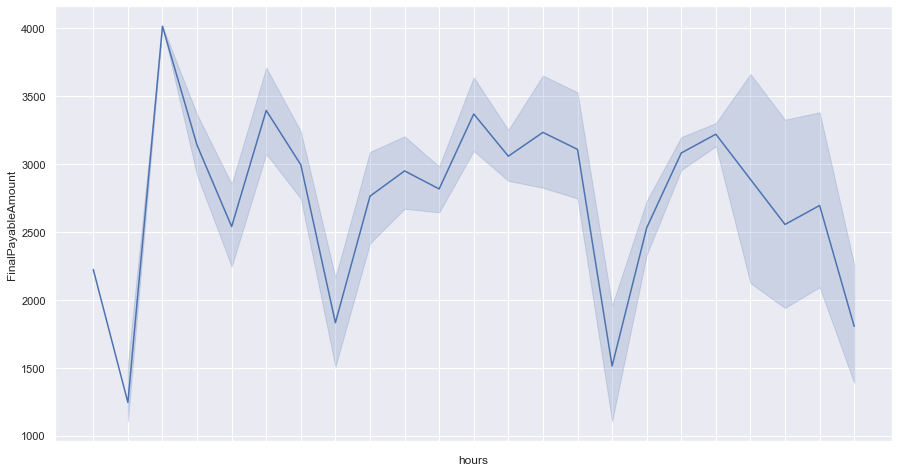

In [271]:
plt.figure(figsize=(15,8))
sns.set(style='darkgrid')
myplot = sns.lineplot(x=df_tri['hours'], y=df_tri['FinalPayableAmount'], data=df_tri)
myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45, fontsize=15)
plt.savefig("Hourly revenue generation in Tri.jpeg")
plt.show()

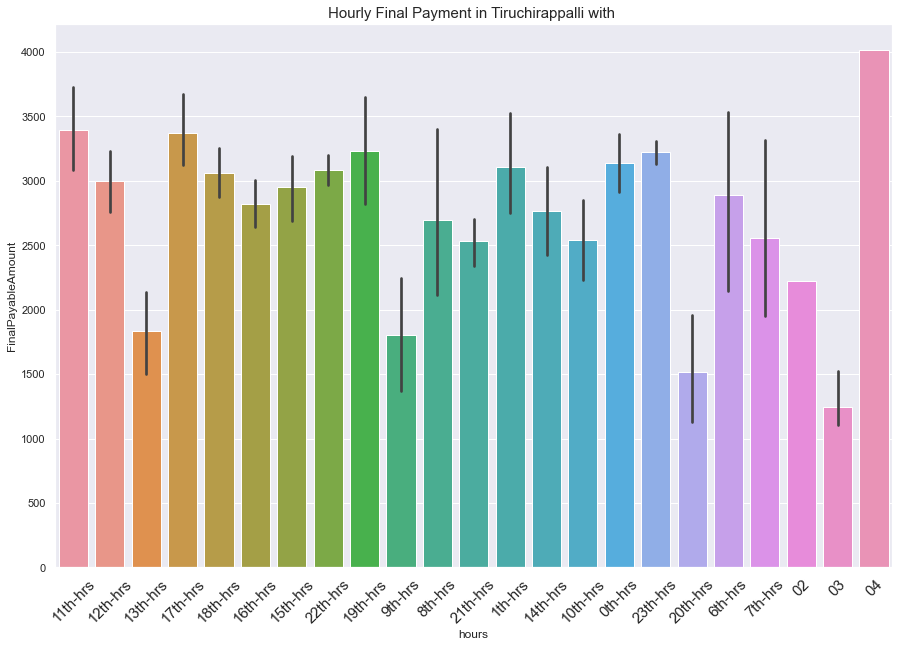

In [339]:
plt.figure(figsize=(15,10))
plots=sns.barplot(x='hours', y = 'FinalPayableAmount', data=df_tri)
plots.set_xticklabels(plots.get_xticklabels(), rotation= 45, fontsize=15)
plt.title("Hourly Final Payment in Tiruchirappalli with ", fontsize=15)
plt.savefig('Hourly payment infor Tiruchirappalli.jpeg')
plt.show()

In [344]:
import folium
import json
from folium import plugins



In [349]:
tMap = folium.Map(location=[10.7905, 78.7047], tiles='Stamen Toner', zoom_start=9)
with open('custom.geo.json') as f:
    tArea = json.load(f)

In [348]:
folium.GeoJason(tArea).add\_tMap 

SyntaxError: unexpected character after line continuation character (<ipython-input-348-e6b1464f9054>, line 1)

In [343]:
pip install folium